# KoNLPy 설치 및 테스트

In [115]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Reading state information...
g++ is already the newest version (4:9.3.0-1ubuntu2).
python3-dev is already the newest version (3.8.2-0ubuntu2).
python-d

In [116]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [117]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install python-mecab-ko

mecab-ko is already installed
mecab-ko-dic is already installed
Install mecab-python
/tmp /content
/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /tmp/mecab-python-0.996
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [118]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
import pandas as pd

import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from mecab import MeCab

In [119]:
# KoNLPy의 Okt 와 Mecab 불러와서 사용해보기
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from mecab import MeCab
Okt = Okt()
mecab = MeCab()
# 예시 문장
sentence = "OMG 공부하기 넘 싫네요. 그래도 스터디 해야됩니다 오마이갓! 지쟈스 하 아~"

In [120]:
Okt.morphs(sentence)

['OMG',
 '공부',
 '하기',
 '넘',
 '싫네요',
 '.',
 '그래도',
 '스터디',
 '해야',
 '됩니다',
 '오마이갓',
 '!',
 '지쟈스',
 '하',
 '아',
 '~']

In [121]:
stop_words = ". 을 를 하 아 ~ , 게 때 는 !"
stop_words = set(stop_words.split(' '))
word_tokens = Okt.morphs(sentence)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',list(word_tokens))
print('불용어 제거 후 :',result)

불용어 제거 전 : ['OMG', '공부', '하기', '넘', '싫네요', '.', '그래도', '스터디', '해야', '됩니다', '오마이갓', '!', '지쟈스', '하', '아', '~']
불용어 제거 후 : ['OMG', '공부', '하기', '넘', '싫네요', '그래도', '스터디', '해야', '됩니다', '오마이갓', '지쟈스']


In [122]:
print("형태소 단위로 문장 분리")
print("----------------------")
print(Okt.morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("----------------------")
print(Okt.nouns(sentence))
print(" ")
print("품사 태킹(PoS)")
print("----------------------")
print(Okt.pos(sentence))
rst_list = Okt.morphs(sentence)

형태소 단위로 문장 분리
----------------------
['OMG', '공부', '하기', '넘', '싫네요', '.', '그래도', '스터디', '해야', '됩니다', '오마이갓', '!', '지쟈스', '하', '아', '~']
 
문장에서 명사 추출
----------------------
['공부', '스터디', '오마이갓', '지쟈스']
 
품사 태킹(PoS)
----------------------
[('OMG', 'Alpha'), ('공부', 'Noun'), ('하기', 'Verb'), ('넘', 'Verb'), ('싫네요', 'Adjective'), ('.', 'Punctuation'), ('그래도', 'Adverb'), ('스터디', 'Noun'), ('해야', 'Verb'), ('됩니다', 'Verb'), ('오마이갓', 'Noun'), ('!', 'Punctuation'), ('지쟈스', 'Noun'), ('하', 'Exclamation'), ('아', 'Exclamation'), ('~', 'Punctuation')]


# KRWordRank 설치

In [76]:
!pip install krwordrank

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 워드클라우드에 활용한 한글 폰트 설치

In [95]:
!apt-get update -qq

In [96]:
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 123332 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [123]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum

# 뮤지컬 <영웅> 키워드 시각화(품사 형태로 토큰화, 불용어 처리)

In [170]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
df = pd.read_csv('/content/drive/MyDrive/와빅_DA주니어_프로젝트_뮤지컬추천인터페이스/뮤지컬엑스칼리버.csv')
df = df.iloc[:, 1:]
df.head()

,musical_title,rate,review_title,review_text,review_date
0,엑스칼리버,5,즐거웠어요^^,무대 연출이 정말 좋더라구여^^,2022.01.28
1,엑스칼리버,2,규모는 큰데..,내용은 아쉬운,2022.01.07
2,엑스칼리버,5,내가 엑스칼리버 몇번 봤더라…,아더와 혼연일체…. 보고 또봐도 보고싶은 뮤지컬… 전율이 아직도 흘러요,2021.12.26
3,엑스칼리버,5,최고 뮤지컬 최고 배우 추천!!,아더와 혼연일체…. 보고 또봐도 보고싶은 뮤지컬… 전율이 아직도 흘러요,2021.12.26
4,엑스칼리버,5,명불허전 시아준수 정말 대단해요,아더와 혼연일체…. 보고 또봐도 보고싶은 뮤지컬… 전율이 아직도 흘러요,2021.12.26


In [152]:
df.shape

(2227, 5)

In [155]:
full_review = df['review_title'] + ' ' + df['review_text']
full_review.head()

0                            즐거웠어요^^ 무대 연출이 정말 좋더라구여^^
1                                     규모는 큰데.. 내용은 아쉬운
2    내가 엑스칼리버 몇번 봤더라… 아더와 혼연일체…. 보고 또봐도 보고싶은 뮤지컬… 전...
3    최고 뮤지컬 최고 배우 추천!! 아더와 혼연일체…. 보고 또봐도 보고싶은 뮤지컬… ...
4    명불허전 시아준수 정말 대단해요 아더와 혼연일체…. 보고 또봐도 보고싶은 뮤지컬… ...
dtype: object

In [156]:
full_review_list = full_review.values.tolist()
full_review_list[:5]

['즐거웠어요^^ 무대 연출이 정말 좋더라구여^^',
 '규모는 큰데.. 내용은 아쉬운',
 '내가 엑스칼리버 몇번 봤더라… 아더와 혼연일체…. 보고 또봐도 보고싶은 뮤지컬… 전율이 아직도 흘러요',
 '최고 뮤지컬 최고 배우 추천!! 아더와 혼연일체…. 보고 또봐도 보고싶은 뮤지컬… 전율이 아직도 흘러요',
 '명불허전 시아준수 정말 대단해요 아더와 혼연일체…. 보고 또봐도 보고싶은 뮤지컬… 전율이 아직도 흘러요']

In [157]:
result = []
for text in full_review_list:
    malist = Okt.pos(text, norm=True, stem=True)
    r = []
    for word in malist:
        if not word[1] in ['Josa', 'Eomi', 'Punctuation', 'Suffix']: #Adverb, Adjective
            r.append(word[0])
    result.append(r)

In [158]:
print(result[:10])

[['즐겁다', '무대', '연출', '정말', '좋다', '구'], ['규모', '크다', '내용', '아쉽다'], ['내', '엑스칼리버', '몇번', '보다', '아더', '혼연', '일체', '보고', '또', '보다', '보다', '뮤지컬', '전율', '아직도', '흐르다'], ['최고', '뮤지컬', '최고', '배우', '추천', '아더', '혼연', '일체', '보고', '또', '보다', '보다', '뮤지컬', '전율', '아직도', '흐르다'], ['명불허전', '시아준수', '정말', '대단하다', '아더', '혼연', '일체', '보고', '또', '보다', '보다', '뮤지컬', '전율', '아직도', '흐르다'], ['뮤지컬', '엑스칼리버', '관람', '후기', '11월', '7일', '아더', '역', '맡다', '서은광', '배우', '마지막', '공연', '관람', '하다', '평소', '좋아하다', '배우', '여러', '뮤지컬', '관람', '하다', '엑스칼리버', '그', '중', '만족도', '높다', '일단', '주연', '배우', '뿐', '아니다', '모든', '배우', '연기', '노래실력', '모두', '뛰어나다', '공연장', '음향', '무대', '관객', '석', '거리', '다', '마음', '들다', '저', '특히', '찬란하다', '햇살', '뮤지컬', '넘버', '가장', '좋다', '멜로디', '가사도', '너무', '좋다', '집', '오다', '계속', '흥얼거리다', '아더', '귀엽다', '장면', '잊다', '수', '없다', 'ㅠ', '오랜', '만', '보다', '뮤지컬', '이다', '정말', '만족하다', '자다', '보다'], ['기대', '없다', '인지', '생각', '괜찮다'], ['생각', '별로', '민영기', '배우', '신', '영', '숙', '배우', '목소리', '대사도', '자다', '들리다', '서은광', '배우', '다른', '배우', '하다', '때

In [159]:
flat_result = []
for x in result:
    for y in x:
        flat_result.append(y)

print(flat_result[:30])

['즐겁다', '무대', '연출', '정말', '좋다', '구', '규모', '크다', '내용', '아쉽다', '내', '엑스칼리버', '몇번', '보다', '아더', '혼연', '일체', '보고', '또', '보다', '보다', '뮤지컬', '전율', '아직도', '흐르다', '최고', '뮤지컬', '최고', '배우', '추천']


In [171]:
f = open('/content/drive/MyDrive/와빅_DA주니어_프로젝트_뮤지컬추천인터페이스/stopwords-ko.txt', 'r')
lines = f.readlines()
stopwords = []
for line in lines:
    line = line.replace('\n', '')
    stopwords.append(line)
f.close()

In [172]:
print('불용어 단어 리스트: ', ' '.join(stopwords))

불용어 단어 리스트:  ! " $ % & ' ( ) * + , - . ... 0 1 2 3 4 5 6 7 8 9 ; < = > ? @ \ ^ _ ` | ~ · — —— ‘ ’ “ ” … 、 。 〈 〉 《 》 가 가까스로 가령 각 각각 각자 각종 갖고말하자면 같다 같이 개의치않고 거니와 거바 거의 것 것과 같이 것들 게다가 게우다 겨우 견지에서 결과에 이르다 결국 결론을 낼 수 있다 겸사겸사 고려하면 고로 곧 공동으로 과 과연 관계가 있다 관계없이 관련이 있다 관하여 관한 관해서는 구 구체적으로 구토하다 그 그들 그때 그래 그래도 그래서 그러나 그러니 그러니까 그러면 그러므로 그러한즉 그런 까닭에 그런데 그런즉 그럼 그럼에도 불구하고 그렇게 함으로써 그렇지 그렇지 않다면 그렇지 않으면 그렇지만 그렇지않으면 그리고 그리하여 그만이다 그에 따르는 그위에 그저 그중에서 그치지 않다 근거로 근거하여 기대여 기점으로 기준으로 기타 까닭으로 까악 까지 까지 미치다 까지도 꽈당 끙끙 끼익 나 나머지는 남들 남짓 너 너희 너희들 네 넷 년 논하지 않다 놀라다 누가 알겠는가 누구 다른 다른 방면으로 다만 다섯 다소 다수 다시 말하자면 다시말하면 다음 다음에 다음으로 단지 답다 당신 당장 대로 하다 대하면 대하여 대해 말하자면 대해서 댕그 더구나 더군다나 더라도 더불어 더욱더 더욱이는 도달하다 도착하다 동시에 동안 된바에야 된이상 두번째로 둘 둥둥 뒤따라 뒤이어 든간에 들 등 등등 딩동 따라 따라서 따위 따지지 않다 딱 때 때가 되어 때문에 또 또한 뚝뚝 라 해도 령 로 로 인하여 로부터 로써 륙 를 마음대로 마저 마저도 마치 막론하고 만 못하다 만약 만약에 만은 아니다 만이 아니다 만일 만큼 말하자면 말할것도 없고 매 매번 메쓰겁다 몇 모 모두 무렵 무릎쓰고 무슨 무엇 무엇때문에 물론 및 바꾸어말하면 바꾸어말하자면 바꾸어서 말하면 바꾸어서 한다면 바꿔 말하면 바로 바와같이 밖에 안된다 반대로 반대로 말하자면 반드시 버금 보는데서 보다더 보드득 본대로 봐 봐라 부류의 사람들 부터

In [173]:
preprocessed_word_tokens = [token for token in flat_result if token not in stopwords and len(token)>1]
preprocessed_word_tokens

['즐겁다',
 '무대',
 '연출',
 '규모',
 '크다',
 '내용',
 '아쉽다',
 '엑스칼리버',
 '몇번',
 '아더',
 '혼연',
 '일체',
 '보고',
 '전율',
 '아직도',
 '흐르다',
 '최고',
 '최고',
 '추천',
 '아더',
 '혼연',
 '일체',
 '보고',
 '전율',
 '아직도',
 '흐르다',
 '명불허전',
 '시아준수',
 '대단하다',
 '아더',
 '혼연',
 '일체',
 '보고',
 '전율',
 '아직도',
 '흐르다',
 '엑스칼리버',
 '관람',
 '후기',
 '11월',
 '7일',
 '아더',
 '맡다',
 '서은광',
 '마지막',
 '공연',
 '관람',
 '평소',
 '좋아하다',
 '여러',
 '관람',
 '엑스칼리버',
 '만족도',
 '높다',
 '주연',
 '아니다',
 '모든',
 '연기',
 '노래실력',
 '뛰어나다',
 '공연장',
 '음향',
 '무대',
 '관객',
 '거리',
 '마음',
 '들다',
 '특히',
 '찬란하다',
 '햇살',
 '넘버',
 '가장',
 '멜로디',
 '가사도',
 '오다',
 '계속',
 '흥얼거리다',
 '아더',
 '귀엽다',
 '장면',
 '잊다',
 '없다',
 '오랜',
 '만족하다',
 '자다',
 '기대',
 '없다',
 '인지',
 '생각',
 '괜찮다',
 '생각',
 '별로',
 '민영기',
 '목소리',
 '대사도',
 '자다',
 '들리다',
 '서은광',
 '뭐라다',
 '전혀',
 '들다',
 '아쉽다',
 '기대',
 '많이',
 '가다',
 '아깝다',
 '엑스칼리버',
 '공이',
 '다가오다',
 '믿다',
 '싶다',
 '않다',
 '현실',
 '받아들이다',
 '보고',
 '싶다',
 '매주',
 '한번',
 '빠지다',
 '않다',
 '봣던',
 '이렇게',
 '서울',
 '공연',
 '막바지',
 '이르다',
 '달다',
 '믿다',
 '기다',
 '않다',
 '아쉽다',
 '공연',
 '내내',
 '

In [175]:
c = Counter(preprocessed_word_tokens)
c = dict(c.most_common(n=150)) # 빈도수가 상위 150개인 단어만 추출
print(c)

{'아더': 858, '최고': 762, '샤아': 749, '공연': 663, '엑스칼리버': 657, '김준수': 567, '넘버': 555, '연기': 541, '무대': 520, '되다': 517, '노래': 460, '재밌다': 459, '자다': 439, '초연': 387, '보고': 346, '없다': 344, '들다': 342, '오다': 297, '가다': 288, '모르가나': 284, '싶다': 226, '관람': 205, '재연': 205, '감동': 204, '도겸': 203, '않다': 195, '모습': 194, '재미있다': 188, '멋지다': 177, '비어': 168, '아쉽다': 167, '많이': 161, '많다': 159, '귀엽다': 157, '추천': 156, '아니다': 156, '생각': 154, '되어다': 153, '기네': 151, '해주다': 150, '멀린': 149, '스토리': 149, '연출': 147, '모든': 143, '처음': 141, '느낌': 140, '화려하다': 133, '행복하다': 121, '새롭다': 120, '다시': 120, '부분': 120, '웅장': 119, '넘다': 118, '나오다': 117, '사람': 116, '서사': 113, '목소리': 107, '앙상블': 105, '감사하다': 105, '작품': 105, '정도': 105, '느끼다': 105, '부르다': 104, '감정': 104, '특히': 102, '한번': 102, '그렇다': 101, '보여주다': 98, '카이': 98, '마지막': 97, '믿다': 97, '오늘': 97, '모르다': 95, '사랑': 93, '바뀌다': 90, '장은아': 89, '느껴지다': 88, '즐겁다': 87, '크다': 87, '몰입': 86, '남다': 85, '막공': 85, '계속': 82, '장면': 82, '자체': 82, '캐릭터': 82, '완벽하다': 81, '예매': 80, '내용': 79, '

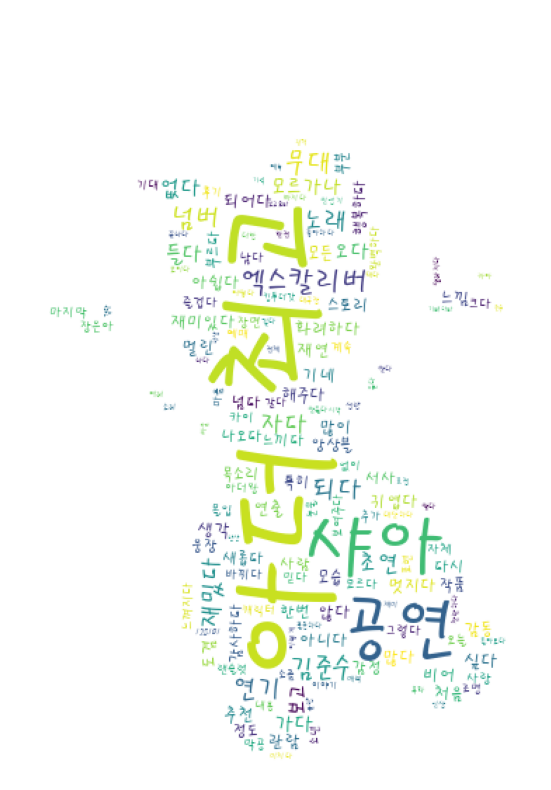

In [177]:
font_path = '/content/drive/MyDrive/와빅_DA주니어_프로젝트_뮤지컬추천인터페이스/HMFMPYUN.TTF'
img = Image.open('/content/drive/MyDrive/와빅_DA주니어_프로젝트_뮤지컬추천인터페이스/올라프.jpg')
img_array = np.array(img)

wc = WordCloud(font_path=font_path, max_font_size=100, background_color='white', mask=img_array)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(gen)

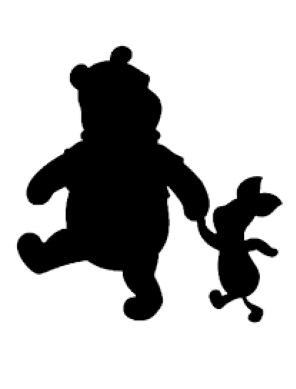

In [113]:
plt.axis("off")
plt.imshow(img)

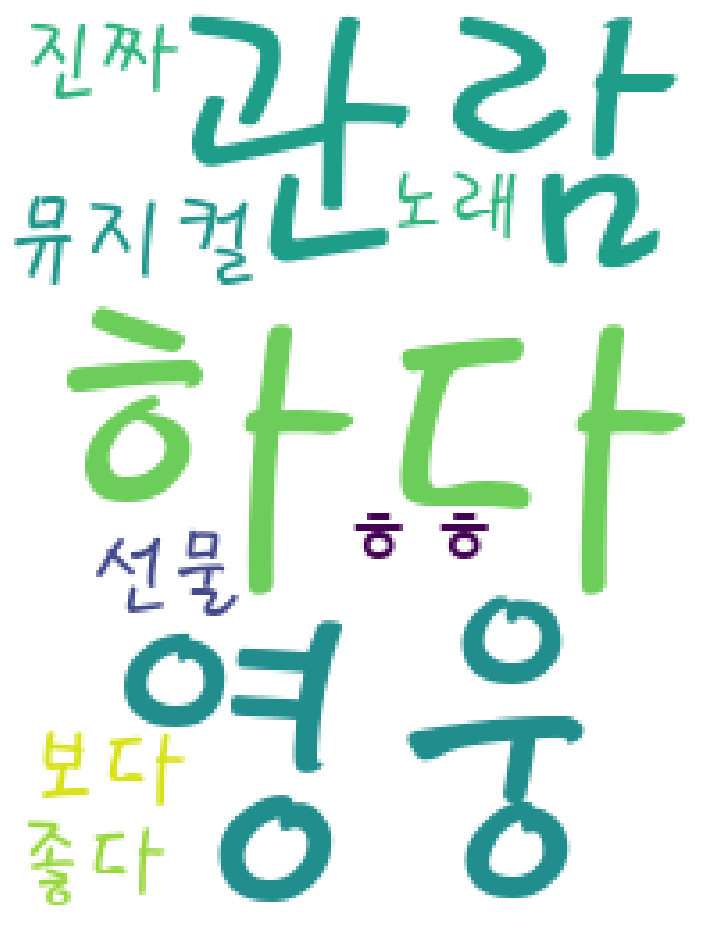

In [109]:
# 시각화

# for winow : font_path='c:/Windows/Fonts/malgun.ttf'
# for mac : font_path='/Library/Fonts/AppleGothic.ttf'
wordcloud = WordCloud(font_path='/content/drive/MyDrive/와빅_DA주니어_프로젝트_뮤지컬추천인터페이스/HMFMPYUN.TTF',
                      relative_scaling = 0.2,
                      background_color='white', mask=img_array
                      ).generate_from_frequencies(c)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# 앨리스에서 어떤 단어가 가장 많이 나왔는지 비율로 표현
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, 
               stopwords=stopwords, collocations=False)

# collocations=False : 연어가 아니라고 설정해줘야 'said Alice가 걸러짐'! (default=True)

wc = wc.generate(text)
wc.words_